In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criando os Dados

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

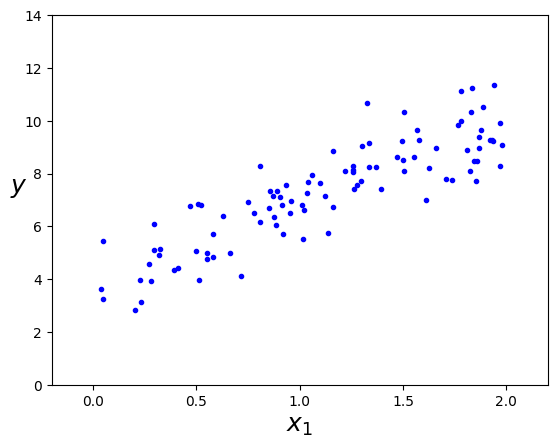

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-0.2, 2.2, 0, 14])
plt.show()

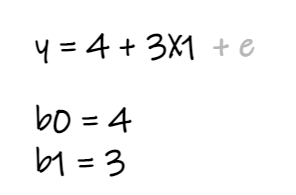

# Regressão Linear

## Equação de uma regressão linear simples (univariada)

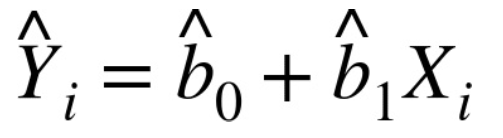

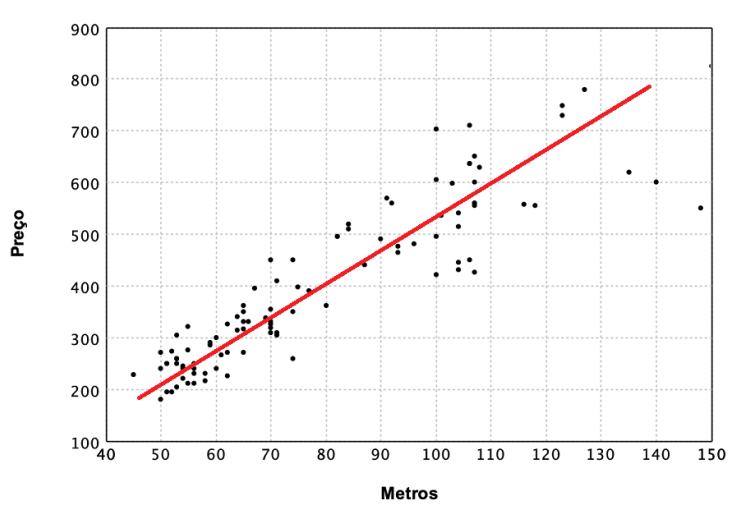

## Forma Vetorizada

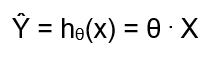

θ = Vetor de parametros do modelo

x = é o vetor de características (features)

θ . x = é o produto escalar dos vetores envolvidos

hθ(x) = é a função de hipotese, usando os parametros do modelo θ.

Exemplo: 2 features

θ = [  θ₀,

    θ₁,
    
    θ₂]  shape: (3, 1)


x = [  1,

     X₁,
      
     X₂]    shape: (3, 1)


θ . X = ŷ = 1.θ₀ + θ₁.X₁ + θ₂.X₂


Obs: é normal tambem vermos a notação θT . X como uma simples multiplação de matriz onde o θ é transformado de vetor coluna em um vetor linha.


# Exemplo

## Base Exemplo

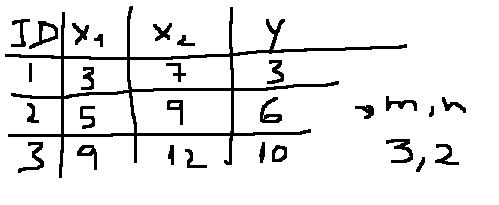

Tabela com coluna ID, duas features X1 e X2 e o label y. Shape do vetor de features X = (3,2)

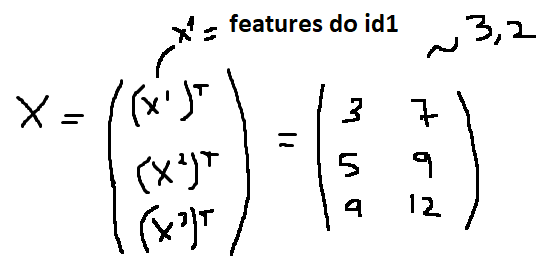

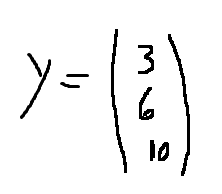

## Vetor Coluna x Vetor Linha

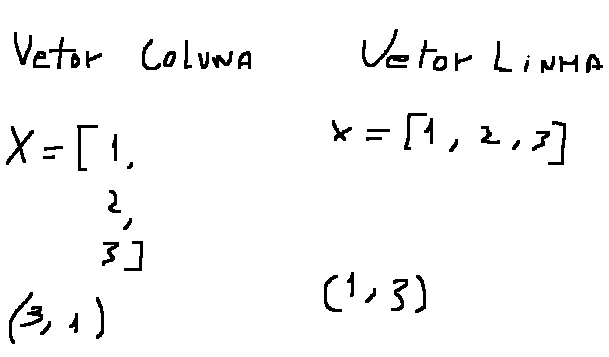

Se atentar as formas que os vetores estarao (coluna ou linha)

## Uso da função de hipótese (modelo)

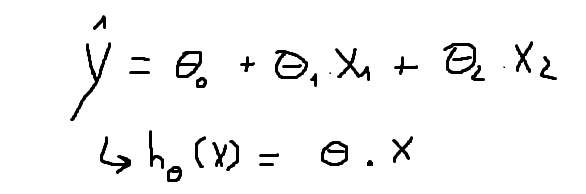

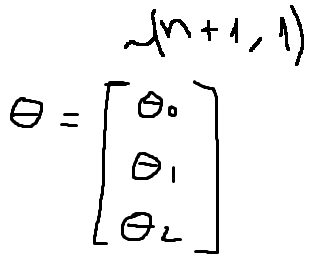

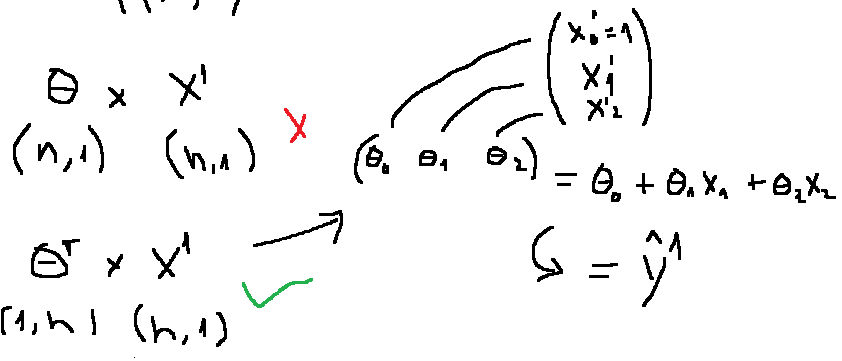

# Função de Custo

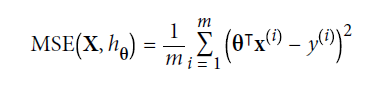

Valor que tentamos minimizar variando nossos parâmetros θ (contrário da função de ganho). 

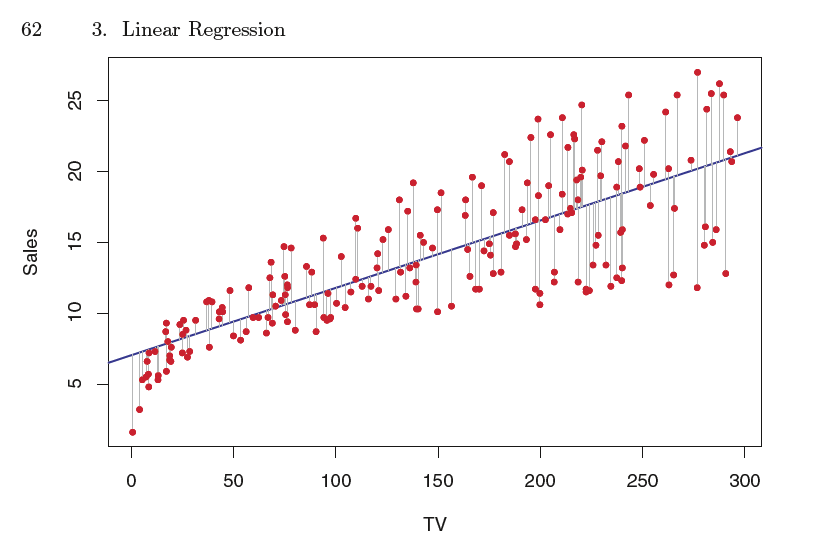

# Minimos Quadrados

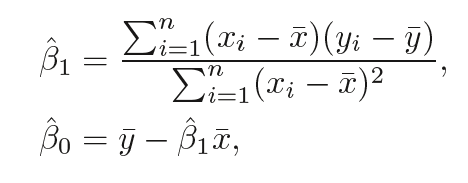

Derivando nossa função de custo em relação aos nossos parâmetros beta0 e beta1 chegamos nas fórmulas acima.

In [4]:
b1 = sum((X - X.mean())*(y - y.mean())) / sum((X - X.mean())**2)
b0 = y.mean() - X.mean()*b1

In [5]:
theta = np.concatenate([b0, b1]).reshape(2,1)

In [6]:
theta

array([[3.87257422],
       [3.06334302]])

In [7]:
theta.shape

(2, 1)

## Previsão

### Criando Vetor de previsão

In [8]:
X_new = np.array([min(X), max(X)]) # prevendo para cada o valor min e máx de X
X_new_b = np.c_[np.ones((2, 1)), X_new]  # adiciona x0 = 1 pra cada instancia
X_new_b

array([[1.        , 0.03668848],
       [1.        , 1.97913875]])

### Utilizando tal vetor e o theta para prever

In [9]:
y_predict = X_new_b.dot(theta)
y_predict

array([[3.98496361],
       [9.93535509]])

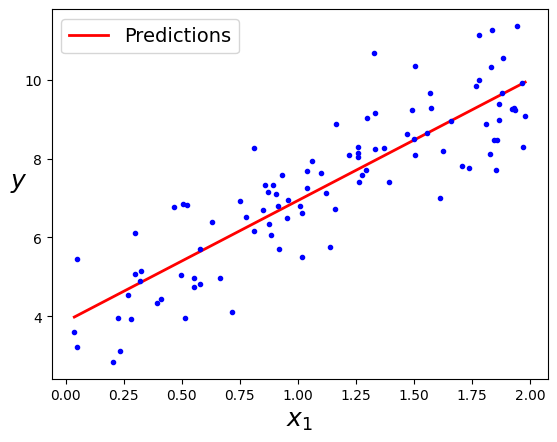

In [10]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
#plt.axis([0, 2, 0, 15])
plt.show()

# Equação Normal

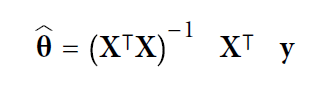

Outra forma de chegarmos aos nossos paramêtros ideais seria através da Equação Normal. Tal equação deriva de manipulação de matrizes que minimizam a função de custo e nos entrega uma solução de forma fechada.

Dois pontos de atenção são:

- Tal equação se torna muito expensiva computacionalmente conforme o número de features aumenta (complexidade de O n^2.4 a n^3).
- Ela exige que X^t * X seja invertível. 

Para contornar (razoavelmente) tais problemas é utilizado SVD (decomposição em valores singulares) que pode decompor a matriz do conjunto de treinamento X na multiplicação de três matrizes. Além de tal solução lidar com a inversão de matrizes, sua complexidade é de On^2.

In [26]:
X_b = np.c_[np.ones((len(X), 1)), X]  # add x0 = 1 to each instance
theta_eq_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta

array([[3.87257422],
       [3.06334302]])

In [13]:
theta_eq_normal

array([[3.87257422],
       [3.06334302]])

# Scikit Learn

In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.87257422]), array([[3.06334302]]))

In [21]:
X_new_b

array([[1.        , 0.03668848],
       [1.        , 1.97913875]])

# Stats Model

In [24]:
import statsmodels.api as sm

X_b = sm.add_constant(X)

model = sm.OLS(y, X_b).fit()
predictions = model.predict(X_b) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     311.4
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.45e-32
Time:                        15:31:07   Log-Likelihood:                -137.58
No. Observations:                 100   AIC:                             279.2
Df Residuals:                      98   BIC:                             284.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8726      0.218     17.745      0.0